In [143]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn.linear_model import LinearRegression
import sklearn
import numpy as np
from pprint import pprint
import math 

import locale
from locale import atof

locale.setlocale(locale.LC_NUMERIC, '')

gd_data = read_csv("C:\\Users\\ashle\\Desktop\\human-development\\gender_development.csv")
gi_data = read_csv("C:\\Users\\ashle\\Desktop\\human-development\\gender_inequality.csv")
hd_data = read_csv("C:\\Users\\ashle\\Desktop\\human-development\\human_development.csv", thousands="_")
ia_data = read_csv("C:\\Users\\ashle\\Desktop\\human-development\\inequality_adjusted.csv")
hi_data = read_csv("C:\\Users\\ashle\\Desktop\\human-development\\historical_index.csv")

mpi_data = read_csv("C:\\Users\\ashle\\Desktop\\human-development\\New folder\\multidimensional_poverty.csv")

In [144]:
whole_data = pd.concat([gd_data, gi_data,hd_data,ia_data,hi_data],axis=1,sort=False, copy = True).drop(['HDI Rank',
       'Human Development Index (HDI)'], axis =1)

In [145]:
whole_data = whole_data.loc[:,~whole_data.columns.duplicated()]

In [146]:
for column in whole_data.columns:
    for row in whole_data.index: 
        if whole_data.loc[row,column] == '..':
            whole_data.loc[row,column]= math.nan
for column in mpi_data.columns:
    for row in mpi_data.index: 
        if mpi_data.loc[row,column] == '..':
            mpi_data.loc[row,column]= math.nan


In [147]:
whole_data.drop(whole_data.index[188:194], axis =0)
whole_data =whole_data.drop(['Income Inequality (Quintile Ratio)','Income Inequality (Palma Rati)', 'Income Inequality (Gini Coefficient)'], axis =1)

In [148]:
for col in whole_data.columns:
    if col != 'Country':
        for i in range(len(whole_data[col])):
            if type(whole_data[col][i]) not in [np.float64, float] and whole_data[col][i] is not None:
                whole_data[col][i] = np.float64(whole_data[col][i].replace(",","_"))

C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [149]:
whole_data.head()

,GDI Rank,Country,Gender Development Index (GDI),Human Development Index (Female),Human Development Index (Male),Life Expectancy at Birth (Female),Life Expectancy at Birth (Male),Expected Years of Education (Female),Expected Years of Education (Male),Mean Years of Education (Female),...,Inequality-Adjusted Education Index,Inequality in Income,Inequality-Adjusted Income Index,Human Development Index (1990),Human Development Index (2000),Human Development Index (2010),Human Development Index (2011),Human Development Index (2012),Human Development Index (2013),Human Development Index (2014)
0,1.0,Norway,0.996,0.94,0.944,83.6,79.5,18.2,16.8,12.7,...,0.886,10.2,0.878,0.849,0.917,0.940,0.941,0.942,0.942,0.944
1,2.0,Australia,0.976,0.922,0.945,84.5,80.3,20.7,19.7,13.1,...,0.914,17.7,0.752,0.865,0.898,0.927,0.930,0.932,0.933,0.935
2,3.0,Switzerland,0.95,0.898,0.945,85,80.8,15.7,15.9,11.5,...,0.816,12.3,0.839,0.831,0.888,0.924,0.925,0.927,0.928,0.930
3,4.0,Denmark,0.977,0.912,0.934,82.2,78.3,19.3,18.1,12.8,...,0.897,14.4,0.787,0.799,0.862,0.908,0.920,0.921,0.923,0.923
4,5.0,Netherlands,0.947,0.893,0.943,83.3,79.7,18,17.9,11.6,...,0.858,11.6,0.817,0.829,0.877,0.909,0.919,0.920,0.920,0.922


In [150]:
mpi_data.head()

,Country,Year and Survey,"Multidimensional Poverty Index (MPI, HDRO)",MPI HDRO Percent,"Multidimensional Poverty Index (MPI, 2010)",MPI 2010 Percent,Population in Multidimensional Poverty,Intensity of Deprivation,Education Deprivation,Health Deprivation,Living Standards,Population Below National Poverty Line,Population Below $1.25 per Day
0,Afghanistan,2010/2011 M,0.293,58.8,0.353,66.2,"17,116",49.9,45.6,19.2,35.2,35.8,NaN
1,Albania,2008/2009 D,0.005,1.2,0.005,1.4,38,38.3,22.4,47.1,30.5,14.3,0.5
2,Argentina,2005 N,0.015,3.7,0.011,2.9,"1,438",39.1,38.2,27.8,34.0,NaN,1.4
3,Armenia,2010 D,0.002,0.6,0.001,0.3,18,37.0,3.4,87.8,8.7,32.0,1.8
4,Azerbaijan,2006 D,0.009,2.4,0.021,5.3,210,38.2,20.0,50.7,29.3,5.3,0.3


In [151]:
sb.pairplot(whole_data.dropna())

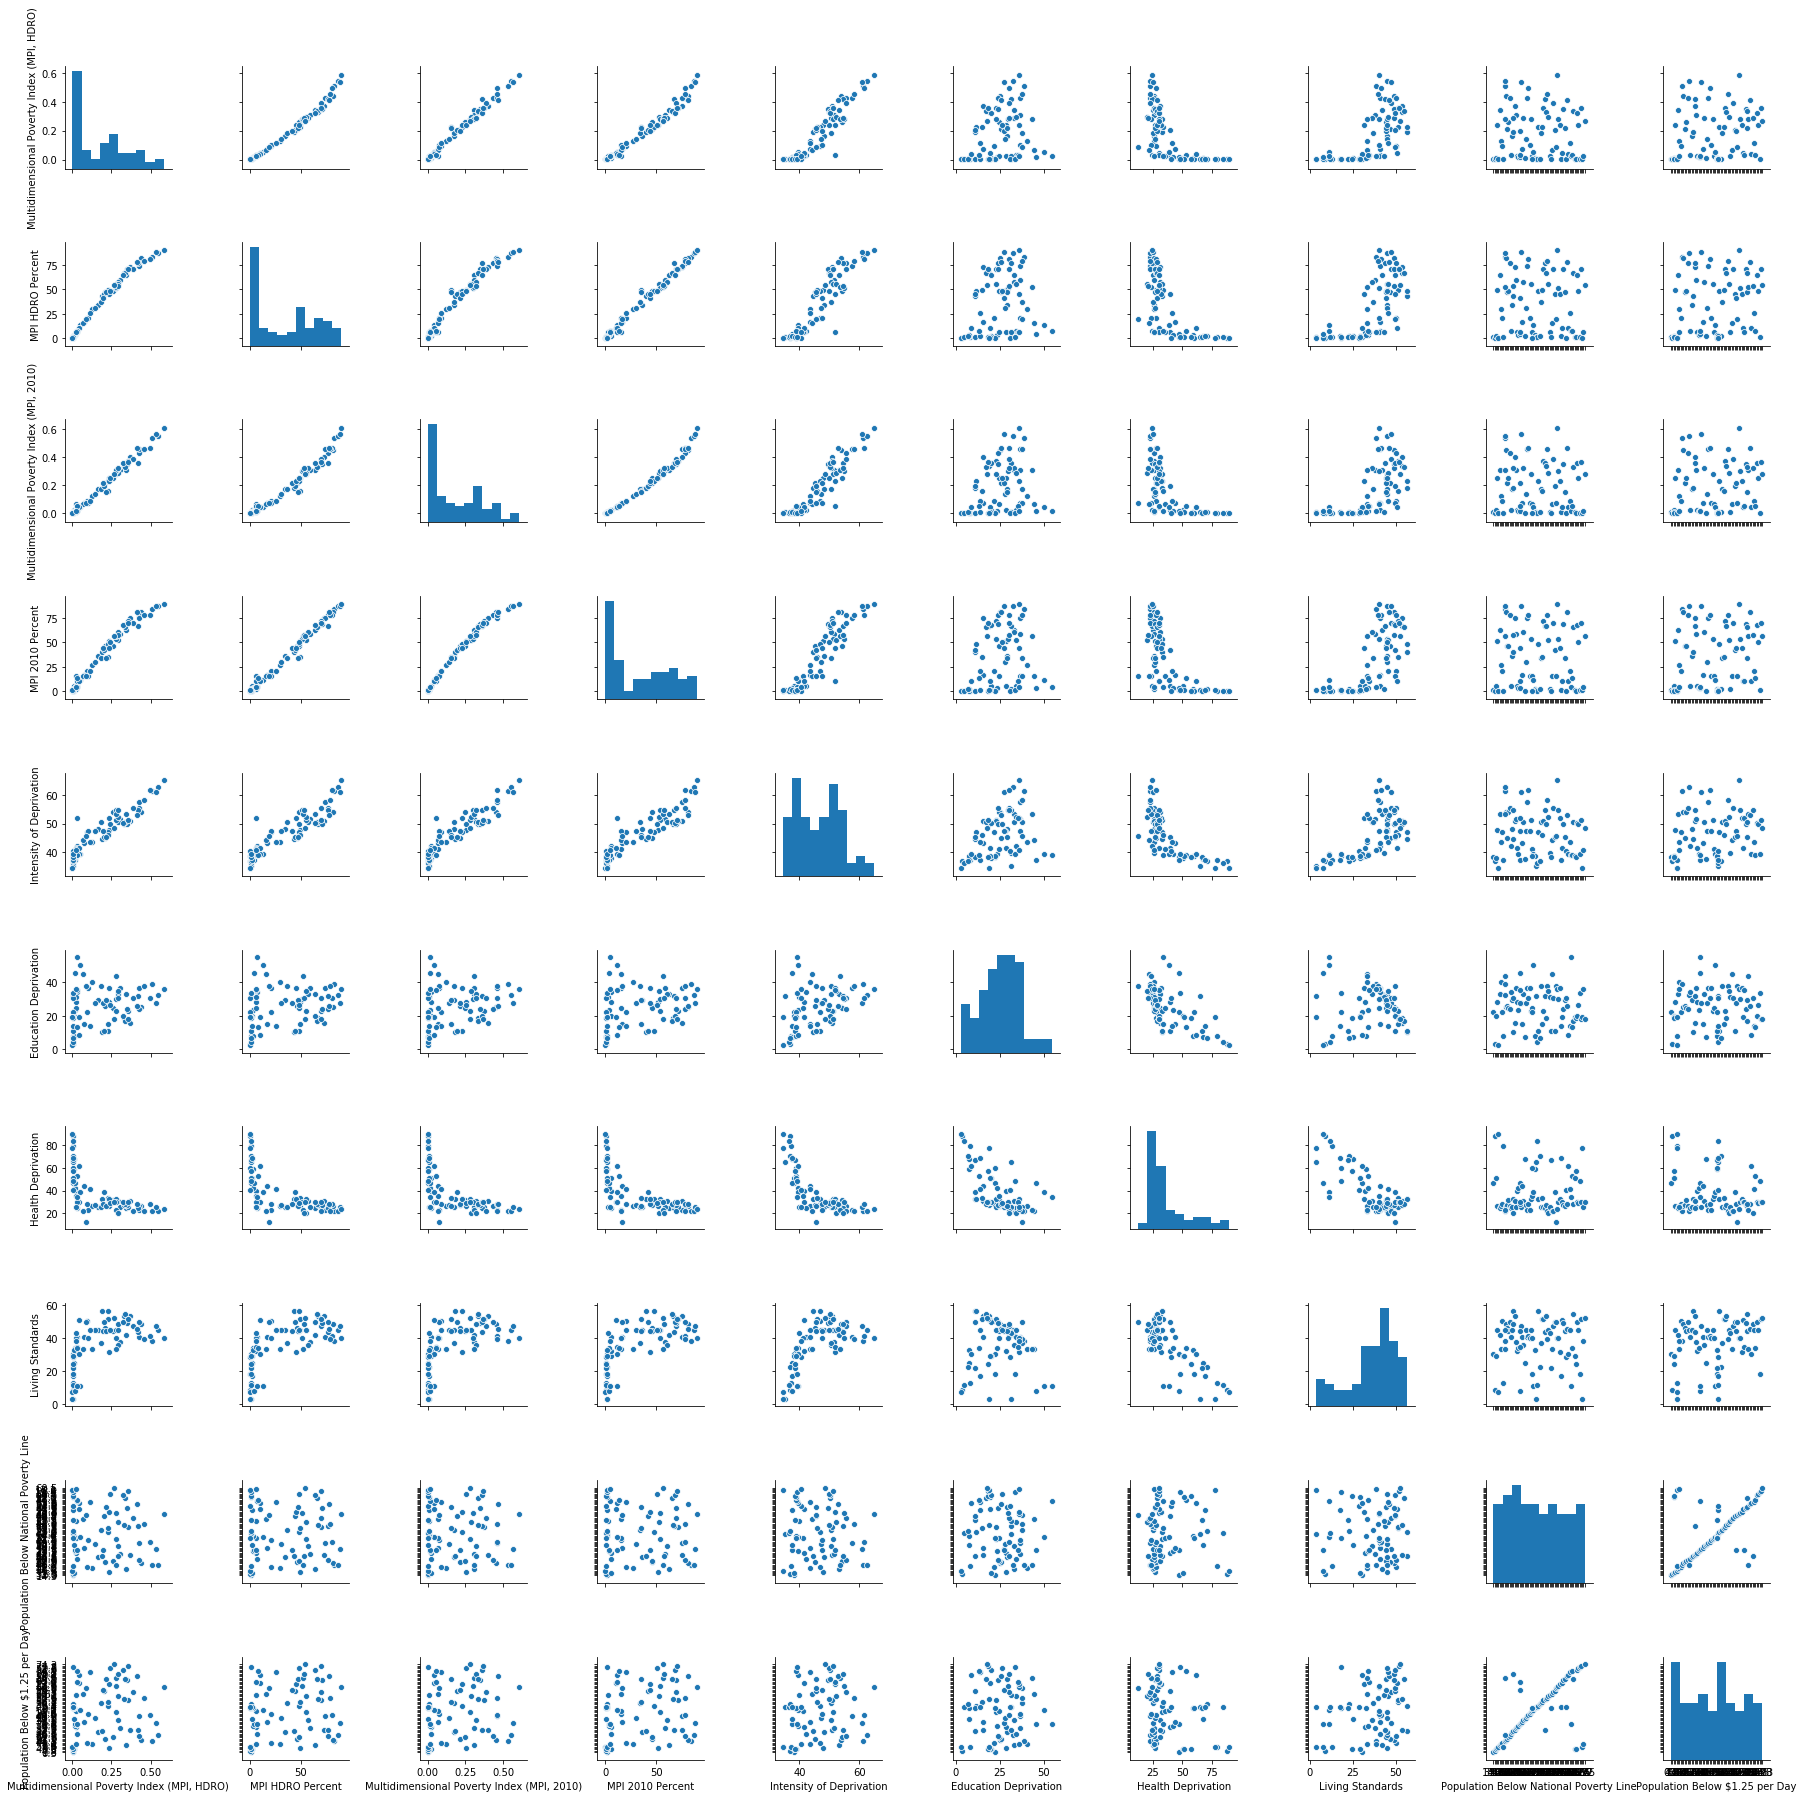

In [153]:
sb.pairplot(mpi_data.dropna())

In [ ]:
##Some Example Plots 
sb.set(style="whitegrid")
plt.figure(figsize=(200, 50))
sb.barplot(x=whole_data['GDI Rank'], y=whole_data['Expected Years of Education'])

In [ ]:
sb.set(style="whitegrid")
plt.figure(figsize=(200, 50))
sb.barplot(x=whole_data['Income Inequality (Gini Coefficient)'], y=whole_data['GDI Rank'])

In [ ]:
mpi_data =mpi_data.drop("Year and Survey", axis =1)
mpi_data.describe()

In [ ]:
sb.set(style="dark")

plt.figure(figsize=(400, 100))
sb.barplot(x=mpi_data['Multidimensional Poverty Index (MPI, HDRO)'], y=mpi_data['Intensity of Deprivation'])

In [ ]:
sb.set(style="darkgrid")
plt.figure(figsize=(200, 50))
sb.barplot(x=mpi_data['Multidimensional Poverty Index (MPI, HDRO)'], y=mpi_data['Health Deprivation'])

In [ ]:
sb.set(style="darkgrid")
plt.figure(figsize=(200, 50))
sb.barplot(x=mpi_data['Multidimensional Poverty Index (MPI, HDRO)'], y=mpi_data['Education Deprivation'])

In [ ]:
sb.set(style="darkgrid")
plt.figure(figsize=(200, 50))
sb.barplot(x=mpi_data['Multidimensional Poverty Index (MPI, HDRO)'], y=mpi_data['Living Standards'])

# Regression Models 
## Now we need to fill in the data points by creating regression models to fill in non-existant data points. To do this we must drop points that have little to no data. 
- We use the loc feature to find all NaN  points. If there are >10 we will delete th erow to protect the integrity of the model

- 'Hong Kong, China (SAR)'
- 'Liechtenstein'
- 'Brunei Darussalam' 
- 'Andorra' 
- 'Bahamas'
- 'Antigua and Barbuda'
- 'Palau'
- 'Seychelles' 
- 'Saint Kitts and Nevis'
- 'Grenada'
- 'Bosnia and Herzegovina'
- 'Dominica'
- 'Saint Vincent and the Grenadines'
- 'Turkmenistan'
- 'Gabon'
- 'Viet Nam'
- 'Cabo Verde'
- 'Micronesia (Federated States of)'
- 'Kiribati'
- 'Equatorial Guinea'
- 'Myanmar'
- 'Angola'
- 'Solomon Islands'
- 'Papua New Guinea'
- 'Haiti'
- 'Djibouti'
- 'Guinea-Bissau'
- 'Eritrea'

In [ ]:
whole_data.drop([whole_data.index[11], whole_data.index[12], whole_data.index[30], whole_data.index[33],
                 whole_data.index[54], whole_data.index[57] ,whole_data.index[59], whole_data.index[63], whole_data.index[76],
                 whole_data.index[78], whole_data.index[86], whole_data.index[93], whole_data.index[97],
                 whole_data.index[108], whole_data.index[109], whole_data.index[117], whole_data.index[121],
                 whole_data.index[122], whole_data.index[137], whole_data.index[136], whole_data.index[147],
                 whole_data.index[148], whole_data.index[156], whole_data.index[157], whole_data.index[162],
                 whole_data.index[167], whole_data.index[177], whole_data.index[185]], axis =0)

- Inequality in Education                                 
- Inequality-Adjusted Education Index                        
- Inequality in Income                                       
- Inequality-Adjusted Income Index 
- Inequality-adjusted HDI (IHDI)                            
- IHDI Loss Percent                                         
- IHDI Rank Difference                                      
- Coefficient of Human Inequality                           
- Inequality in Life Expectancy  

In [ ]:
df = whole_data.dropna()
df.head()